In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [2]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [3]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [6]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\Madhu\AppData\Local\Temp\ipykernel_6420\965255522.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [7]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

Rating                                              Title  \
0        4.0                Good phone-could have been better !   
1        4.0                   This is a branded budget phone 📱   
2        4.0                     Budget friendly reliable phone   
3        4.0                             A mildly perfect phone   
4        4.0                              About delivery person   
...      ...                                                ...   
4995     2.0                                                  1   
4996     4.0                     Decent one at this price range   
4997     3.0                                               Good   
4998     2.0  Adapter kharab ho gya mera replacement k liye ...   
4999     5.0                                    amazing product   

                                                 Review  \
0     I've purchased the 6GB version of this phone w...   
1     This is definitely a budget branded phone 📱 af...   
2     I bought the phone in Jan 2023 @ 18250. Below ...   
3     I will try to keep this review short. This rev...   
4     Delivery person taking 250 rs on cash amountAn...   
...                                                 ...   
4995                                                  1   
4996  Just. Ok or i can say a decent one at this pri...   
4997  The media could not be loaded.\n              ...   
4998  Accessories iska adaptor kharab ho gya after 3...   
4999  the battery works for 2 days .camera quality i...   

                                   Review_Date  
0     Reviewed in India 🇮🇳 on 19 December 2022  
1       Reviewed in India 🇮🇳 on 5 January 2023  
2      Reviewed in India 🇮🇳 on 5 February 2023  
3      Reviewed in India 🇮🇳 on 12 January 2023  
4     Reviewed in India 🇮🇳 on 10 February 2023  
...                                        ...  
4995                           1 December 2022  
4996                              4 March 2022  
4997                            11 August 2022  
4998                           6 November 2022  
4999                            15 August 2022  

[5000 rows x 4 columns]

In [8]:
df.to_csv("Amazon_Reviews_Oneplus_Nord_CE2.csv")

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

In [10]:
# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is alr

In [12]:
# load the dataset
reviews=pd.read_csv('Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

Rating                                              Title  \
0        4.0                Good phone-could have been better !   
1        4.0                   This is a branded budget phone 📱   
2        4.0                     Budget friendly reliable phone   
3        4.0                             A mildly perfect phone   
4        4.0                              About delivery person   
...      ...                                                ...   
4995     2.0                                                  1   
4996     4.0                     Decent one at this price range   
4997     3.0                                               Good   
4998     2.0  Adapter kharab ho gya mera replacement k liye ...   
4999     5.0                                    amazing product   

                                                 Review  \
0     I've purchased the 6GB version of this phone w...   
1     This is definitely a budget branded phone 📱 af...   
2     I bought the phone in Jan 2023 @ 18250. Below ...   
3     I will try to keep this review short. This rev...   
4     Delivery person taking 250 rs on cash amountAn...   
...                                                 ...   
4995                                                  1   
4996  Just. Ok or i can say a decent one at this pri...   
4997  The media could not be loaded.\n              ...   
4998  Accessories iska adaptor kharab ho gya after 3...   
4999  the battery works for 2 days .camera quality i...   

                                   Review_Date  
0     Reviewed in India 🇮🇳 on 19 December 2022  
1       Reviewed in India 🇮🇳 on 5 January 2023  
2      Reviewed in India 🇮🇳 on 5 February 2023  
3      Reviewed in India 🇮🇳 on 12 January 2023  
4     Reviewed in India 🇮🇳 on 10 February 2023  
...                                        ...  
4995                           1 December 2022  
4996                              4 March 2022  
4997                            11 August 2022  
4998                           6 November 2022  
4999                            15 August 2022  

[5000 rows x 4 columns]

In [13]:
reviews.Rating.describe()

count    5000.000000
mean        4.221400
std         0.787976
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [14]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

Review  word_count
0  I've purchased the 6GB version of this phone w...         299
1  This is definitely a budget branded phone 📱 af...         152
2  I bought the phone in Jan 2023 @ 18250. Below ...         192
3  I will try to keep this review short. This rev...         216
4  Delivery person taking 250 rs on cash amountAn...          44

In [15]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

Review  char_count
0  I've purchased the 6GB version of this phone w...      1715.0
1  This is definitely a budget branded phone 📱 af...       807.0
2  I bought the phone in Jan 2023 @ 18250. Below ...      1127.0
3  I will try to keep this review short. This rev...      1189.0
4  Delivery person taking 250 rs on cash amountAn...       229.0

In [16]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

Review  avg_word
0  I've purchased the 6GB version of this phone w...  4.755034
1  This is definitely a budget branded phone 📱 af...  4.344371
2  I bought the phone in Jan 2023 @ 18250. Below ...  4.875000
3  I will try to keep this review short. This rev...  4.509259
4  Delivery person taking 250 rs on cash amountAn...  4.227273

In [17]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

Review  stopwords
0  I've purchased the 6GB version of this phone w...        128
1  This is definitely a budget branded phone 📱 af...         53
2  I bought the phone in Jan 2023 @ 18250. Below ...         56
3  I will try to keep this review short. This rev...         94
4  Delivery person taking 250 rs on cash amountAn...         19

In [18]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

Review  hashtags
0  I've purchased the 6GB version of this phone w...         0
1  This is definitely a budget branded phone 📱 af...         0
2  I bought the phone in Jan 2023 @ 18250. Below ...         0
3  I will try to keep this review short. This rev...         0
4  Delivery person taking 250 rs on cash amountAn...         0

In [19]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

Review  numerics
0  I've purchased the 6GB version of this phone w...         2
1  This is definitely a budget branded phone 📱 af...         7
2  I bought the phone in Jan 2023 @ 18250. Below ...         3
3  I will try to keep this review short. This rev...         0
4  Delivery person taking 250 rs on cash amountAn...         3

In [20]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

Review  upper
0  I've purchased the 6GB version of this phone w...      4
1  This is definitely a budget branded phone 📱 af...      3
2  I bought the phone in Jan 2023 @ 18250. Below ...      9
3  I will try to keep this review short. This rev...      3
4  Delivery person taking 250 rs on cash amountAn...      1

In [22]:
reviews.drop(['numerics','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

In [23]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I've purchased the 6GB version of this phone w...
1    His is definitely a budget branded phone 📱 aft...
2    I bought the phone in An 2023 @ 18250. Below a...
3    I will try to keep this review short. His revi...
4    Delivery person taking 250 is on cash amountin...
Name: Review, dtype: object

In [24]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0       Reviewed
1       Reviewed
2       Reviewed
3       Reviewed
4       Reviewed
          ...   
4995           1
4996           4
4997          11
4998           6
4999          15
Name: Review_Date, Length: 5000, dtype: object 
 0             in
1             in
2             in
3             in
4             in
          ...   
4995    December
4996       March
4997      August
4998    November
4999      August
Name: Review_Date, Length: 5000, dtype: object 
 0       India
1       India
2       India
3       India
4       India
        ...  
4995     2022
4996     2022
4997     2022
4998     2022
4999     2022
Name: Review_Date, Length: 5000, dtype: object


In [25]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

Date     Month   Year
0     Reviewed        in  India
1     Reviewed        in  India
2     Reviewed        in  India
3     Reviewed        in  India
4     Reviewed        in  India
...        ...       ...    ...
4995         1  December   2022
4996         4     March   2022
4997        11    August   2022
4998         6  November   2022
4999        15    August   2022

[5000 rows x 3 columns]

In [26]:
df.Month.value_counts()

in           2350
October       498
November      395
September     352
August        254
December      230
January       213
July          209
June          169
May           142
February       84
April          60
March          44
Name: Month, dtype: int64

In [27]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

Month
0           in
1           in
2           in
3           in
4           in
...        ...
4995  December
4996         3
4997    August
4998  November
4999    August

[5000 rows x 1 columns]

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        4999 non-null   object 
 2   Review       4764 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   hashtags     5000 non-null   int64  
 5   Date         5000 non-null   object 
 6   Month        5000 non-null   object 
 7   Year         5000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 312.6+ KB


In [32]:
df1[['Date','Year']]=df1[['Date','Year']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        4999 non-null   object 
 2   Review       4764 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   hashtags     5000 non-null   int64  
 5   Date         5000 non-null   object 
 6   Month        5000 non-null   object 
 7   Year         5000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 312.6+ KB


In [33]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

Rating                                Title  \
0     4.0  Good phone-could have been better !   
1     4.0     This is a branded budget phone 📱   
2     4.0       Budget friendly reliable phone   
3     4.0               A mildly perfect phone   
4     4.0                About delivery person   

                                              Review  hashtags      Date  \
0  I've purchased the 6GB version of this phone w...         0  Reviewed   
1  This is definitely a budget branded phone 📱 af...         0  Reviewed   
2  I bought the phone in Jan 2023 @ 18250. Below ...         0  Reviewed   
3  I will try to keep this review short. This rev...         0  Reviewed   
4  Delivery person taking 250 rs on cash amountAn...         0  Reviewed   

  Month   Year  
0    in  India  
1    in  India  
2    in  India  
3    in  India  
4    in  India

In [34]:
df

Rating                                              Title  \
0        4.0                Good phone-could have been better !   
1        4.0                   This is a branded budget phone 📱   
2        4.0                     Budget friendly reliable phone   
3        4.0                             A mildly perfect phone   
4        4.0                              About delivery person   
...      ...                                                ...   
4995     2.0                                                  1   
4996     4.0                     Decent one at this price range   
4997     3.0                                               Good   
4998     2.0  Adapter kharab ho gya mera replacement k liye ...   
4999     5.0                                    amazing product   

                                                 Review  \
0     I've purchased the 6GB version of this phone w...   
1     This is definitely a budget branded phone 📱 af...   
2     I bought the phone in Jan 2023 @ 18250. Below ...   
3     I will try to keep this review short. This rev...   
4     Delivery person taking 250 rs on cash amountAn...   
...                                                 ...   
4995                                                  1   
4996  Just. Ok or i can say a decent one at this pri...   
4997  The media could not be loaded.\n              ...   
4998  Accessories iska adaptor kharab ho gya after 3...   
4999  the battery works for 2 days .camera quality i...   

                                   Review_Date  hashtags      Date     Month  \
0     Reviewed in India 🇮🇳 on 19 December 2022         0  Reviewed        in   
1       Reviewed in India 🇮🇳 on 5 January 2023         0  Reviewed        in   
2      Reviewed in India 🇮🇳 on 5 February 2023         0  Reviewed        in   
3      Reviewed in India 🇮🇳 on 12 January 2023         0  Reviewed        in   
4     Reviewed in India 🇮🇳 on 10 February 2023         0  Reviewed        in   
...                                        ...       ...       ...       ...   
4995                           1 December 2022         0         1  December   
4996                              4 March 2022         0         4     March   
4997                            11 August 2022         0        11    August   
4998                           6 November 2022         0         6  November   
4999                            15 August 2022         0        15    August   

       Year  
0     India  
1     India  
2     India  
3     India  
4     India  
...     ...  
4995   2022  
4996   2022  
4997   2022  
4998   2022  
4999   2022  

[5000 rows x 8 columns]

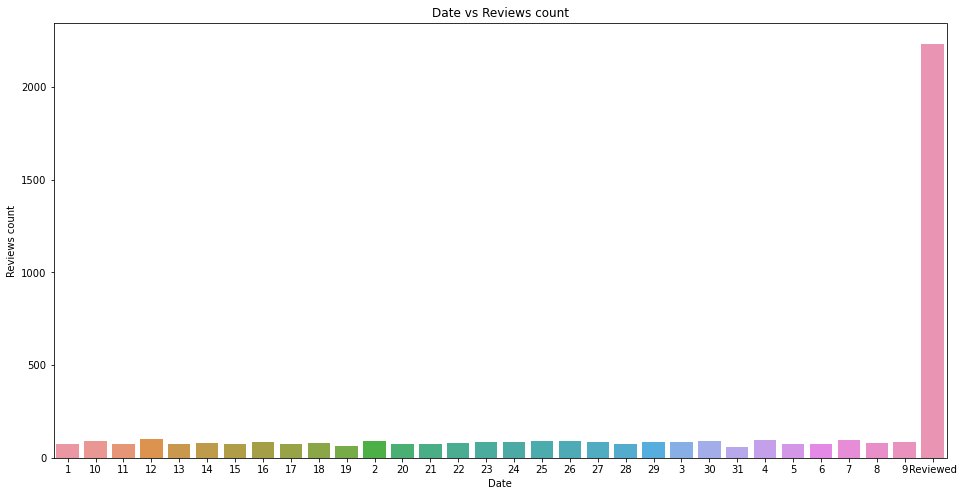

In [35]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date']
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

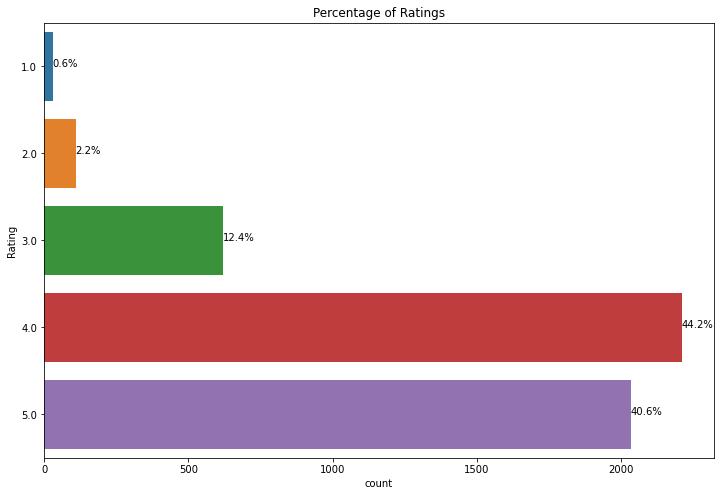

In [36]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

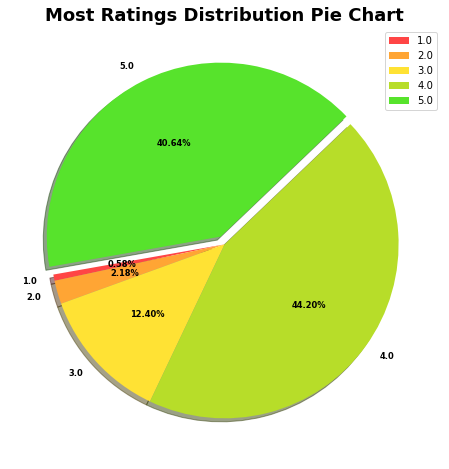

In [37]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [39]:
data = df[['Review']]
data

Review
0     I've purchased the 6GB version of this phone w...
1     This is definitely a budget branded phone 📱 af...
2     I bought the phone in Jan 2023 @ 18250. Below ...
3     I will try to keep this review short. This rev...
4     Delivery person taking 250 rs on cash amountAn...
...                                                 ...
4995                                                  1
4996  Just. Ok or i can say a decent one at this pri...
4997  The media could not be loaded.\n              ...
4998  Accessories iska adaptor kharab ho gya after 3...
4999  the battery works for 2 days .camera quality i...

[5000 rows x 1 columns]

In [40]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [41]:
data

Review
0     i've purchased 6gb version phone comes extenda...
1     this definitely budget branded phone 📱 1 month...
2     i bought phone jan 2023 @ 18250. below pros co...
3     i try keep review short. this review perspecti...
4     delivery person taking 250 rs cash amountand t...
...                                                 ...
4995                                                  1
4996  just. ok say decent one price range. but expec...
4997                       the media could loaded. good
4998  accessories iska adaptor kharab ho gya 3 month...
4999  battery works 2 days .camera quality amazing,s...

[5000 rows x 1 columns]

In [42]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [43]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  bought phone jan pro con observed pro lightwei...   
3  try keep review short review perspective avera...   
4  delivery person taking r cash amountand told a...   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  This is definitely a budget branded phone 📱 af...  
2  I bought the phone in Jan 2023 @ 18250. Below ...  
3  I will try to keep this review short. This rev...  
4  Delivery person taking 250 rs on cash amountAn...

In [44]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [45]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  bought phone jan pro con observed pro lightwei...   
3  try keep review short review perspective avera...   
4  delivery person taking r cash amountand told a...   
5  nice mobile first time use one plus mobile pho...   
6  received today quality good apt gamers video w...   
7  phone good indeed classy value money ki baat k...   
8  looking discount let bein range one goodbrand ...   
9   good phone fast charging lag gaming overall good   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  This is definitely a budget branded phone 📱 af...  
2  I bought the phone in Jan 2023 @ 18250. Below ...  
3  I will try to keep this review short. This rev...  
4  Delivery person taking 250 rs on cash amountAn...  
5  Very nice mobile and my first time in use one ...  
6  I received it today. The quality is good. It's...  
7  Phone is very good and indeed classy,But value...  
8  Looking more discount but let it beIn this ran...  
9  Good phone, fast charging, no lag while gaming...

In [46]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  bought phone jan pro con observed pro lightwei...   
3  try keep review short review perspective avera...   
4  delivery person taking r cash amountand told a...   
5  nice mobile first time use one plus mobile pho...   
6  received today quality good apt gamers video w...   
7  phone good indeed classy value money ki baat k...   
8  looking discount let bein range one goodbrand ...   
9   good phone fast charging lag gaming overall good   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  This is definitely a budget branded phone 📱 af...  
2  I bought the phone in Jan 2023 @ 18250. Below ...  
3  I will try to keep this review short. This rev...  
4  Delivery person taking 250 rs on cash amountAn...  
5  Very nice mobile and my first time in use one ...  
6  I received it today. The quality is good. It's...  
7  Phone is very good and indeed classy,But value...  
8  Looking more discount but let it beIn this ran...  
9  Good phone, fast charging, no lag while gaming...

In [47]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  bought phone jan pro con observed pro lightwei...   
3  try keep review short review perspective avera...   
4  delivery person taking r cash amountand told a...   
5  nice mobile first time use one plus mobile pho...   
6  received today quality good apt gamers video w...   
7  phone good indeed classy value money ki baat k...   
8  looking discount let bein range one goodbrand ...   
9   good phone fast charging lag gaming overall good   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  This is definitely a budget branded phone 📱 af...  
2  I bought the phone in Jan 2023 @ 18250. Below ...  
3  I will try to keep this review short. This rev...  
4  Delivery person taking 250 rs on cash amountAn...  
5  Very nice mobile and my first time in use one ...  
6  I received it today. The quality is good. It's...  
7  Phone is very good and indeed classy,But value...  
8  Looking more discount but let it beIn this ran...  
9  Good phone, fast charging, no lag while gaming...

In [48]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  bought phone jan pro con observed pro lightwei...   
3  try keep review short review perspective avera...   
4  delivery person taking r cash amountand told a...   
5  nice mobile first time use one plus mobile pho...   
6  received today quality good apt gamers video w...   
7  phone good indeed classy value money ki baat k...   
8  looking discount let bein range one goodbrand ...   
9   good phone fast charging lag gaming overall good   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  This is definitely a budget branded phone 📱 af...  
2  I bought the phone in Jan 2023 @ 18250. Below ...  
3  I will try to keep this review short. This rev...  
4  Delivery person taking 250 rs on cash amountAn...  
5  Very nice mobile and my first time in use one ...  
6  I received it today. The quality is good. It's...  
7  Phone is very good and indeed classy,But value...  
8  Looking more discount but let it beIn this ran...  
9  Good phone, fast charging, no lag while gaming...

In [49]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  bought phone jan pro con observed pro lightwei...   
3  try keep review short review perspective avera...   
4  delivery person taking r cash amountand told a...   
5  nice mobile first time use one plus mobile pho...   
6  received today quality good apt gamers video w...   
7  phone good indeed classy value money ki baat k...   
8  looking discount let bein range one goodbrand ...   
9   good phone fast charging lag gaming overall good   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  This is definitely a budget branded phone 📱 af...  
2  I bought the phone in Jan 2023 @ 18250. Below ...  
3  I will try to keep this review short. This rev...  
4  Delivery person taking 250 rs on cash amountAn...  
5  Very nice mobile and my first time in use one ...  
6  I received it today. The quality is good. It's...  
7  Phone is very good and indeed classy,But value...  
8  Looking more discount but let it beIn this ran...  
9  Good phone, fast charging, no lag while gaming...

In [50]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [51]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  bought phone jan pro con observed pro lightwei...   
3  try keep review short review perspective avera...   
4  delivery person taking r cash amountand told a...   
5  nice mobile first time use one plus mobile pho...   
6  received today quality good apt gamers video w...   
7  phone good indeed classy value money ki baat k...   
8  looking discount let bein range one goodbrand ...   
9   good phone fast charging lag gaming overall good   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  This is definitely a budget branded phone 📱 af...  
2  I bought the phone in Jan 2023 @ 18250. Below ...  
3  I will try to keep this review short. This rev...  
4  Delivery person taking 250 rs on cash amountAn...  
5  Very nice mobile and my first time in use one ...  
6  I received it today. The quality is good. It's...  
7  Phone is very good and indeed classy,But value...  
8  Looking more discount but let it beIn this ran...  
9  Good phone, fast charging, no lag while gaming...

In [52]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [53]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  bought phone jan pro con observed pro lightwei...   
3  try keep review short review perspective avera...   
4  delivery person taking r cash amountand told a...   
5  nice mobile first time use one plus mobile pho...   
6  received today quality good apt gamers video w...   
7  phone good indeed classy value money ki baat k...   
8  looking discount let bein range one goodbrand ...   
9   good phone fast charging lag gaming overall good   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  This is definitely a budget branded phone 📱 af...  
2  I bought the phone in Jan 2023 @ 18250. Below ...  
3  I will try to keep this review short. This rev...  
4  Delivery person taking 250 rs on cash amountAn...  
5  Very nice mobile and my first time in use one ...  
6  I received it today. The quality is good. It's...  
7  Phone is very good and indeed classy,But value...  
8  Looking more discount but let it beIn this ran...  
9  Good phone, fast charging, no lag while gaming...

In [54]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  bought phone jan pro con observed pro lightwei...   
3  try keep review short review perspective avera...   
4  delivery person taking r cash amountand told a...   
5  nice mobile first time use one plus mobile pho...   
6  received today quality good apt gamers video w...   
7  phone good indeed classy value money ki baat k...   
8  looking discount let bein range one goodbrand ...   
9   good phone fast charging lag gaming overall good   

                                   Uncleaned_Reviews  \
0  I've purchased the 6GB version of this phone w...   
1  This is definitely a budget branded phone 📱 af...   
2  I bought the phone in Jan 2023 @ 18250. Below ...   
3  I will try to keep this review short. This rev...   
4  Delivery person taking 250 rs on cash amountAn...   
5  Very nice mobile and my first time in use one ...   
6  I received it today. The quality is good. It's...   
7  Phone is very good and indeed classy,But value...   
8  Looking more discount but let it beIn this ran...   
9  Good phone, fast charging, no lag while gaming...   

                                    tokenized_tweets  
0  [purchased, gb, version, phone, come, extendab...  
1  [definitely, budget, branded, phone, month, da...  
2  [bought, phone, jan, pro, con, observed, pro, ...  
3  [try, keep, review, short, review, perspective...  
4  [delivery, person, taking, r, cash, amountand,...  
5  [nice, mobile, first, time, use, one, plus, mo...  
6  [received, today, quality, good, apt, gamers, ...  
7  [phone, good, indeed, classy, value, money, ki...  
8  [looking, discount, let, bein, range, one, goo...  
9  [good, phone, fast, charging, lag, gaming, ove...

In [55]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [57]:
import codecs
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [58]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [59]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  bought phone jan pro con observed pro lightwei...   
3  try keep review short review perspective avera...   
4  delivery person taking r cash amountand told a...   
5  nice mobile first time use one plus mobile pho...   
6  received today quality good apt gamers video w...   
7  phone good indeed classy value money ki baat k...   
8  looking discount let bein range one goodbrand ...   
9   good phone fast charging lag gaming overall good   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  This is definitely a budget branded phone 📱 af...  
2  I bought the phone in Jan 2023 @ 18250. Below ...  
3  I will try to keep this review short. This rev...  
4  Delivery person taking 250 rs on cash amountAn...  
5  Very nice mobile and my first time in use one ...  
6  I received it today. The quality is good. It's...  
7  Phone is very good and indeed classy,But value...  
8  Looking more discount but let it beIn this ran...  
9  Good phone, fast charging, no lag while gaming...

In [60]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['definitely', 'budget', 'branded', 'phone', 'month', 'day', 'use', 'today', 'posting', 'review', 'got', 'phone', 'childrens', 'day', 'gift', 'father', 'pro', 'heavy', 'user', 'charge', 'stay', 'hour', 'otherwise', 'stay', 'almost', 'day', 'smooth', 'touch', 'issue', 'typing', 'anything', 'camera', 'quality', 'awesome', 'show', 'original', 'skin', 'texture', 'audio', 'quality', 'also', 'awesome', 'video', 'quality', 'wow', 'g', 'enable', 'clean', 'uicons', 'filter', 'lover', 'like', 'original', 'skin', 'texture', 'phone', 'phone', 'p', 'resolution', 'limited', 'g', 'band', 'hdr', 'support', 'netflix', 'amazon', 'prime', 'mean', 'viewing', 'experience', 'always', 'lag', 'behind'])

In [61]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [purchased, gb, version, phone, come, extendab...
1    [definitely, budget, branded, phone, month, da...
2    [bought, phone, jan, pro, con, observed, pro, ...
3    [try, keep, review, short, review, perspective...
4    [delivery, person, taking, r, cash, amountand,...
5    [nice, mobile, first, time, use, one, plus, mo...
6    [received, today, quality, good, apt, gamers, ...
7    [phone, good, indeed, classy, value, money, ki...
8    [looking, discount, let, bein, range, one, goo...
9    [good, phone, fast, charging, lag, gaming, ove...
Name: Clean_Reviews, dtype: object

In [62]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [63]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

stemmed
0     purchas gb version phone come extend gb ram vi...
1     definit budget brand phone month day use today...
2     bought phone jan pro con observ pro lightweigh...
3     tri keep review short review perspect averag u...
4     deliveri person take r cash amountand told add...
...                                                 ...
4943  product look best batteri backup good charg sp...
4944           ok say decent one price rang expect much
4945                             medium could load good
4946  accessori iska adaptor kharab ho gya month ser...
4947  batteri work day camera qualiti amaz speedi ch...

[4948 rows x 1 columns]

In [64]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


stemmed
0     purchased gb version phone come extendable gb ...
1     definitely budget branded phone month day use ...
2     bought phone jan pro con observed pro lightwei...
3     try keep review short review perspective avera...
4     delivery person taking r cash amountand told a...
...                                                 ...
4943  product looking best battery backup good charg...
4944          ok say decent one price range expect much
4945                           medium could loaded good
4946  accessory iska adaptor kharab ho gya month ser...
4947  battery work day camera quality amazing speedy...

[4948 rows x 1 columns]

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [66]:
#print(cv.vocabulary_)

In [67]:
print(cv.get_feature_names()[109:200])

['ago', 'agree', 'ah', 'ahead', 'aheadof', 'ai', 'aince', 'airtel', 'ak', 'aknh', 'al', 'alart', 'albeit', 'alert', 'alexa', 'alignment', 'alike', 'allover', 'allow', 'allram', 'allready', 'allright', 'allround', 'allrounder', 'almost', 'alone', 'along', 'alot', 'already', 'alril', 'also', 'alsothe', 'alspath', 'alternate', 'alternative', 'although', 'altogether', 'always', 'amaging', 'amaze', 'amazed', 'amazing', 'amazingly', 'amazon', 'amazone', 'amazonit', 'ambient', 'amd', 'amezing', 'amezingcharging', 'amezon', 'amh', 'amloiedover', 'ammolated', 'amo', 'amolad', 'amoled', 'amolid', 'among', 'amount', 'amountand', 'ample', 'amzon', 'anazing', 'andar', 'andbcamera', 'andfinger', 'andif', 'andorid', 'android', 'androidbattery', 'angel', 'angle', 'angry', 'animation', 'announce', 'announces', 'annoying', 'another', 'answer', 'answering', 'antutu', 'anybody', 'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anyways', 'anywehe', 'anywhere']


C:\Users\Madhu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
print(cv.get_feature_names()[:100])

['aa', 'aacha', 'aaj', 'aanouncementcamera', 'aap', 'aapko', 'aaplog', 'aati', 'aayega', 'ab', 'abhi', 'able', 'abnd', 'abnormal', 'absence', 'absent', 'absolutely', 'absolutelybut', 'absolutelynot', 'absurd', 'abt', 'acalso', 'accept', 'acceptable', 'acceptablecamera', 'accepted', 'accepts', 'access', 'accessible', 'accessing', 'accessory', 'accha', 'accidental', 'accommodated', 'accomodate', 'accomplished', 'according', 'accordingbrand', 'account', 'accurate', 'acha', 'achcha', 'achchha', 'achchhi', 'ache', 'achha', 'achhe', 'achhi', 'achi', 'achievable', 'achieve', 'achieved', 'acknowledge', 'across', 'act', 'activate', 'activated', 'activates', 'activity', 'actual', 'actually', 'ad', 'adamant', 'adapter', 'adaption', 'adaptive', 'adaptor', 'add', 'added', 'addict', 'addicted', 'adding', 'addition', 'additional', 'address', 'adepter', 'adjust', 'adjusted', 'adjusting', 'adjustment', 'admit', 'adopted', 'adopter', 'adoptor', 'advance', 'advanced', 'advantage', 'adventurous', 'adverti

In [69]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### CountVectorizer with N-grams (Bigrams & Trigrams)

In [70]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4948 [00:00<?, ?it/s]

In [71]:
corpus[3]

'tri keep review short review perspect averag user believ buy phone start use chang adjust without complain much alway better devic price use tool noth much pro camera pretti good con softwar sweet littl featur one plu make sweet neg speed power run app peopl use gener without issu build qualiti good well given go use sort case con con see batteri need charg twice day brows internet use camera time watch youtub instagram facebook medium app like hour two mid bright maximum achiev screen time around hour given high speed charger batteri realli issu tweak around set delet preinstal app stop unnecessari app background easili achiev hr plu screen time peac'

In [72]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [73]:
X.shape

(4948, 5000)

In [74]:
cv.get_feature_names()[:20]

['aacha',
 'aap',
 'aayega',
 'ab',
 'abl',
 'abl use',
 'absenc',
 'absent',
 'absolut',
 'absolut awesom',
 'absolut awesom phone',
 'absolut fine',
 'absolut perfect',
 'absolut stun',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price']

In [75]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [76]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

aacha  aap  aayega  ab  abl  abl use  absenc  absent  absolut  \
0         0    0       0   0    0        0       0       0        0   
1         0    0       0   0    0        0       0       0        0   
2         0    0       0   0    1        1       0       0        0   
3         0    0       0   0    0        0       0       0        0   
4         0    0       0   0    0        0       0       0        0   
...     ...  ...     ...  ..  ...      ...     ...     ...      ...   
4943      0    0       0   0    0        0       0       0        0   
4944      0    0       0   0    0        0       0       0        0   
4945      0    0       0   0    0        0       0       0        0   
4946      0    0       0   0    0        0       0       0        0   
4947      0    0       0   0    0        0       0       0        0   

      absolut awesom  ...  youtub etc  youtub instagram  youtub review  \
0                  0  ...           0                 0              0   
1                  0  ...           0                 0              0   
2                  0  ...           0                 0              0   
3                  0  ...           0                 1              0   
4                  0  ...           0                 0              0   
...              ...  ...         ...               ...            ...   
4943               0  ...           0                 0              0   
4944               0  ...           0                 0              0   
4945               0  ...           0                 0              0   
4946               0  ...           0                 0              0   
4947               0  ...           0                 0              0   

      youtub video  yr  zee  zero  zoom  zoom realli  zoom realli good  
0                0   0    0     0     0            0                 0  
1                0   0    0     0     0            0                 0  
2                0   0    0     0     0            0                 0  
3                0   0    0     0     0            0                 0  
4                0   0    0     0     0            0                 0  
...            ...  ..  ...   ...   ...          ...               ...  
4943             0   0    0     0     0            0                 0  
4944             0   0    0     0     0            0                 0  
4945             0   0    0     0     0            0                 0  
4946             0   0    0     0     0            0                 0  
4947             0   0    0     0     0            0                 0  

[4948 rows x 5000 columns]

### TF-IDF Vectorizer

In [77]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4948 [00:00<?, ?it/s]

In [78]:
corpus[4]

'deliveri person take r cash amountand told add day order goodbut product nice want review take extra money peopl'

In [79]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [80]:
X.shape

(4948, 5000)

In [81]:
tfidf_v.get_feature_names()[:20]

C:\Users\Madhu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aacha',
 'aap',
 'aayega',
 'ab',
 'abl',
 'abl use',
 'absenc',
 'absent',
 'absolut',
 'absolut awesom',
 'absolut awesom phone',
 'absolut fine',
 'absolut perfect',
 'absolut stun',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price']

In [82]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [83]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

aacha  aap  aayega   ab      abl   abl use  absenc  absent  absolut  \
0       0.0  0.0     0.0  0.0  0.00000  0.000000     0.0     0.0      0.0   
1       0.0  0.0     0.0  0.0  0.00000  0.000000     0.0     0.0      0.0   
2       0.0  0.0     0.0  0.0  0.07493  0.091963     0.0     0.0      0.0   
3       0.0  0.0     0.0  0.0  0.00000  0.000000     0.0     0.0      0.0   
4       0.0  0.0     0.0  0.0  0.00000  0.000000     0.0     0.0      0.0   
...     ...  ...     ...  ...      ...       ...     ...     ...      ...   
4943    0.0  0.0     0.0  0.0  0.00000  0.000000     0.0     0.0      0.0   
4944    0.0  0.0     0.0  0.0  0.00000  0.000000     0.0     0.0      0.0   
4945    0.0  0.0     0.0  0.0  0.00000  0.000000     0.0     0.0      0.0   
4946    0.0  0.0     0.0  0.0  0.00000  0.000000     0.0     0.0      0.0   
4947    0.0  0.0     0.0  0.0  0.00000  0.000000     0.0     0.0      0.0   

      absolut awesom  ...  youtub etc  youtub instagram  youtub review  \
0                0.0  ...         0.0           0.00000            0.0   
1                0.0  ...         0.0           0.00000            0.0   
2                0.0  ...         0.0           0.00000            0.0   
3                0.0  ...         0.0           0.10266            0.0   
4                0.0  ...         0.0           0.00000            0.0   
...              ...  ...         ...               ...            ...   
4943             0.0  ...         0.0           0.00000            0.0   
4944             0.0  ...         0.0           0.00000            0.0   
4945             0.0  ...         0.0           0.00000            0.0   
4946             0.0  ...         0.0           0.00000            0.0   
4947             0.0  ...         0.0           0.00000            0.0   

      youtub video   yr  zee  zero  zoom  zoom realli  zoom realli good  
0              0.0  0.0  0.0   0.0   0.0          0.0               0.0  
1              0.0  0.0  0.0   0.0   0.0          0.0               0.0  
2              0.0  0.0  0.0   0.0   0.0          0.0               0.0  
3              0.0  0.0  0.0   0.0   0.0          0.0               0.0  
4              0.0  0.0  0.0   0.0   0.0          0.0               0.0  
...            ...  ...  ...   ...   ...          ...               ...  
4943           0.0  0.0  0.0   0.0   0.0          0.0               0.0  
4944           0.0  0.0  0.0   0.0   0.0          0.0               0.0  
4945           0.0  0.0  0.0   0.0   0.0          0.0               0.0  
4946           0.0  0.0  0.0   0.0   0.0          0.0               0.0  
4947           0.0  0.0  0.0   0.0   0.0          0.0               0.0  

[4948 rows x 5000 columns]

### Named Entity Recognition (NER)

In [84]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'purchased gb version phone come extendable gb ram virtual memory capability good phone least expensive category offering one plus small evident point get noticed first thing confusing placement power button hence finger sensor daily handling mobile phone feel bit annoying finger locking un locking phone try handle place pocket although big problem still something think second point lag noticeable bit hoping might go away update improvement third point speaker volume speaker good near maximum level e volume seem creep steadily rather louds top volume limit fourth point final one camera shoot color realistic photo taken day light especially skin tone tend coloured led flash average could better good awesome part phone practicality daily user one plus strong brand part pricing offered battery life good charging capability also impressive someone like moved android phone build phone apt survive normal fall mishap happening phone feel solid hand stock android clean nothing complain overall

In [85]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_trf')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [86]:
for token in doc_block[:50]:
    print(token,token.pos_)  

purchased VERB
gb PROPN
version NOUN
phone NOUN
come VERB
extendable ADJ
gb PROPN
ram PROPN
virtual ADJ
memory NOUN
capability NOUN
good ADJ
phone NOUN
least ADJ
expensive ADJ
category NOUN
offering NOUN
one NUM
plus CCONJ
small ADJ
evident ADJ
point NOUN
get AUX
noticed VERB
first ADJ
thing NOUN
confusing ADJ
placement NOUN
power NOUN
button NOUN
hence ADV
finger NOUN
sensor NOUN
daily ADV
handling NOUN
mobile ADJ
phone NOUN
feel NOUN
bit NOUN
annoying ADJ
finger NOUN
locking NOUN
un ADV
locking VERB
phone NOUN
try VERB
handle VERB
place NOUN
pocket NOUN
although SCONJ


In [87]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]

In [88]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0        phone   2150
1       camera   1530
2      battery   1038
3      quality    912
4      product    491
5        price    474
6       mobile    361
7         life    346
8  performance    321
9     charging    309

<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

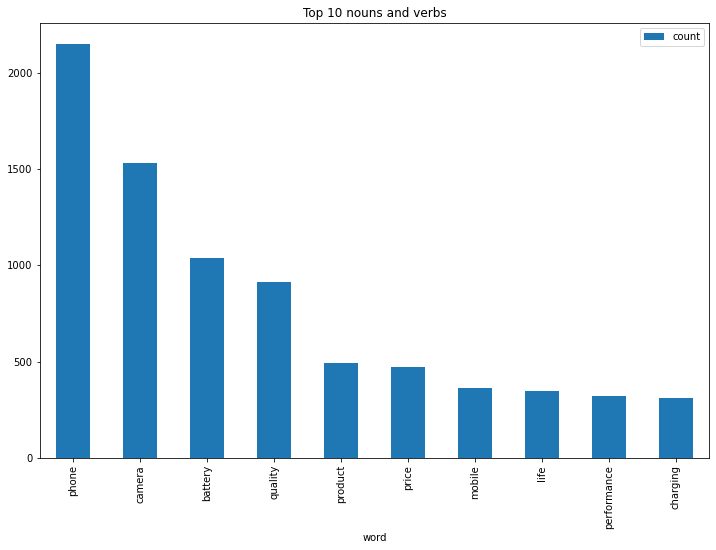

In [89]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [90]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [92]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [93]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

Clean_Reviews
pos           4574
neg            374

In [94]:
dataframe.Clean_Reviews[8]

'looking discount let bein range one goodbrand matter'

In [97]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'compound': 0.0258}

In [99]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

Review  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  bought phone jan pro con observed pro lightwei...   
3  try keep review short review perspective avera...   
4  delivery person taking r cash amountand told a...   

                                              scores  
0  {'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...  
1  {'neg': 0.045, 'neu': 0.584, 'pos': 0.371, 'co...  
2  {'neg': 0.053, 'neu': 0.63, 'pos': 0.317, 'com...  
3  {'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...  
4  {'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'comp...

In [100]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

Review  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  bought phone jan pro con observed pro lightwei...   
3  try keep review short review perspective avera...   
4  delivery person taking r cash amountand told a...   

                                              scores  compound  
0  {'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...    0.9876  
1  {'neg': 0.045, 'neu': 0.584, 'pos': 0.371, 'co...    0.9839  
2  {'neg': 0.053, 'neu': 0.63, 'pos': 0.317, 'com...    0.9908  
3  {'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...    0.9776  
4  {'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'comp...    0.4215

In [101]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

Review  \
0     purchased gb version phone come extendable gb ...   
1     definitely budget branded phone month day use ...   
2     bought phone jan pro con observed pro lightwei...   
3     try keep review short review perspective avera...   
4     delivery person taking r cash amountand told a...   
...                                                 ...   
4943  product looking best battery backup good charg...   
4944          ok say decent one price range expect much   
4945                           medium could loaded good   
4946  accessory iska adaptor kharab ho gya month ser...   
4947  battery work day camera quality amazing speedy...   

                                                 scores  compound sentiment  
0     {'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...    0.9876  Positive  
1     {'neg': 0.045, 'neu': 0.584, 'pos': 0.371, 'co...    0.9839  Positive  
2     {'neg': 0.053, 'neu': 0.63, 'pos': 0.317, 'com...    0.9908  Positive  
3     {'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...    0.9776  Positive  
4     {'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'comp...    0.4215  Positive  
...                                                 ...       ...       ...  
4943  {'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'comp...    0.9246  Positive  
4944  {'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'comp...    0.2960  Positive  
4945  {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...    0.4404  Positive  
4946  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  
4947  {'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'comp...    0.7717  Positive  

[4948 rows x 4 columns]

In [102]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

C:\Users\Madhu\anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [104]:
temp = df.groupby('sentiment').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='rainbow')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

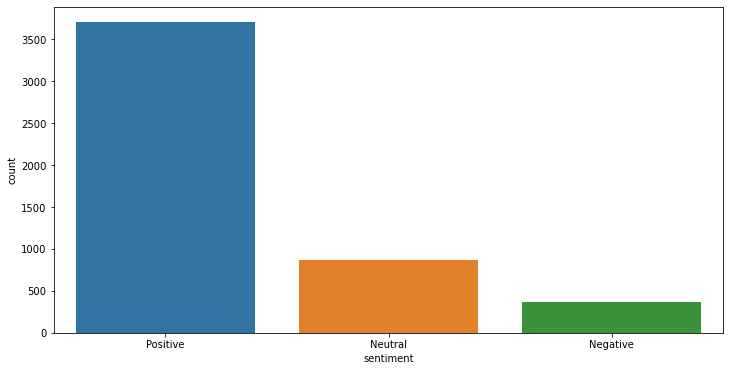

In [105]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

C:\Users\Madhu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='compound', ylabel='Density'>

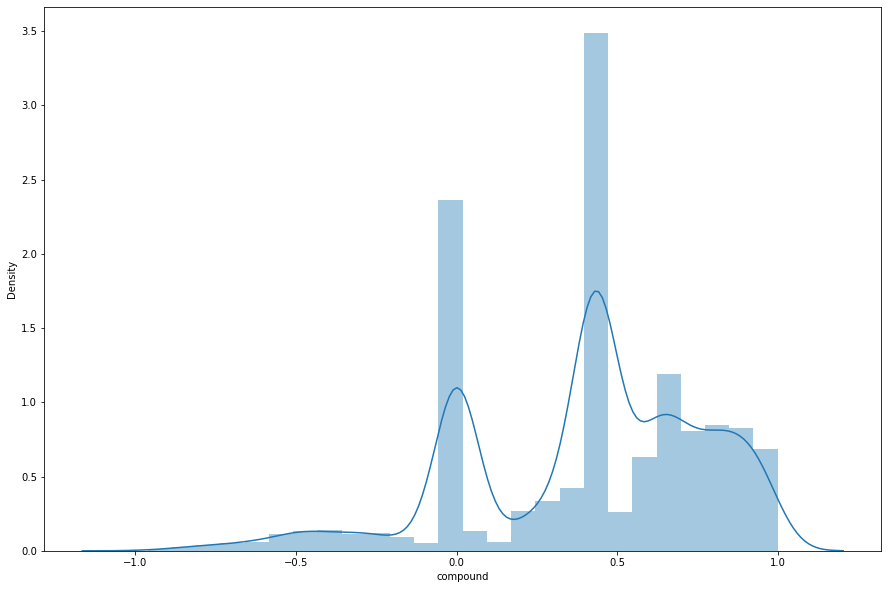

In [106]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [108]:
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review','word_count']].head()

Review  word_count
0  purchased gb version phone come extendable gb ...         165
1  definitely budget branded phone month day use ...          73
2  bought phone jan pro con observed pro lightwei...         123
3  try keep review short review perspective avera...         112
4  delivery person taking r cash amountand told a...          19

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='compound'>

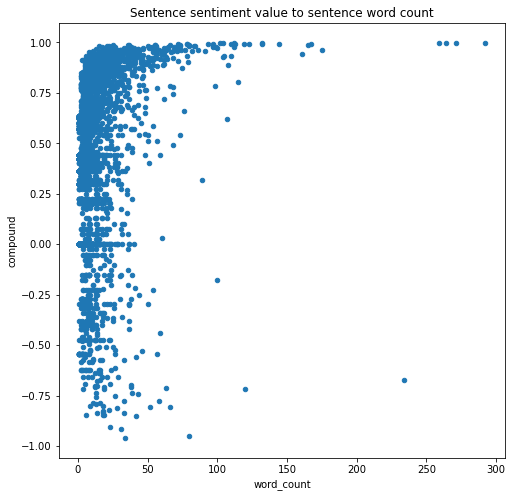

In [109]:
# Correlation analysis
df.plot.scatter(x='word_count',y='compound',figsize=(8,8),title='Sentence sentiment value to sentence word count')

In [110]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

Clean_Reviews
pos           4636
neg            312

In [111]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  bought phone jan pro con observed pro lightwei...   
3  try keep review short review perspective avera...   
4  delivery person taking r cash amountand told a...   

                                   Uncleaned_Reviews  Subjectivity  Polarity  
0  I've purchased the 6GB version of this phone w...      0.486111  0.180556  
1  This is definitely a budget branded phone 📱 af...      0.685863  0.219395  
2  I bought the phone in Jan 2023 @ 18250. Below ...      0.541389  0.357222  
3  I will try to keep this review short. This rev...      0.498519  0.169769  
4  Delivery person taking 250 rs on cash amountAn...      0.550000  0.300000

Text(0, 0.5, 'Subjectivity')

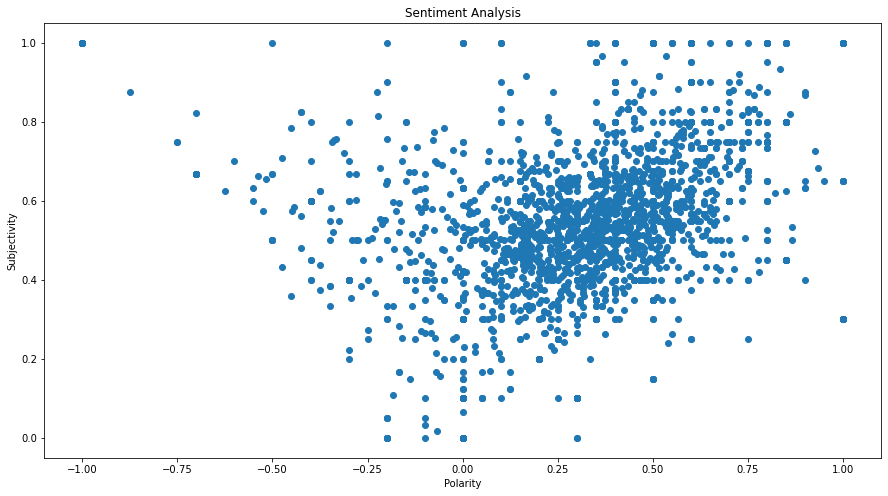

In [112]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [113]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [115]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  definitely budget branded phone month day use ...   
2  bought phone jan pro con observed pro lightwei...   
3  try keep review short review perspective avera...   
4  delivery person taking r cash amountand told a...   

                                   Uncleaned_Reviews  Subjectivity  Polarity  \
0  I've purchased the 6GB version of this phone w...      0.486111  0.180556   
1  This is definitely a budget branded phone 📱 af...      0.685863  0.219395   
2  I bought the phone in Jan 2023 @ 18250. Below ...      0.541389  0.357222   
3  I will try to keep this review short. This rev...      0.498519  0.169769   
4  Delivery person taking 250 rs on cash amountAn...      0.550000  0.300000   

  sentiment  
0       pos  
1       pos  
2       pos  
3       pos  
4       pos

### Story Generation and Visualization

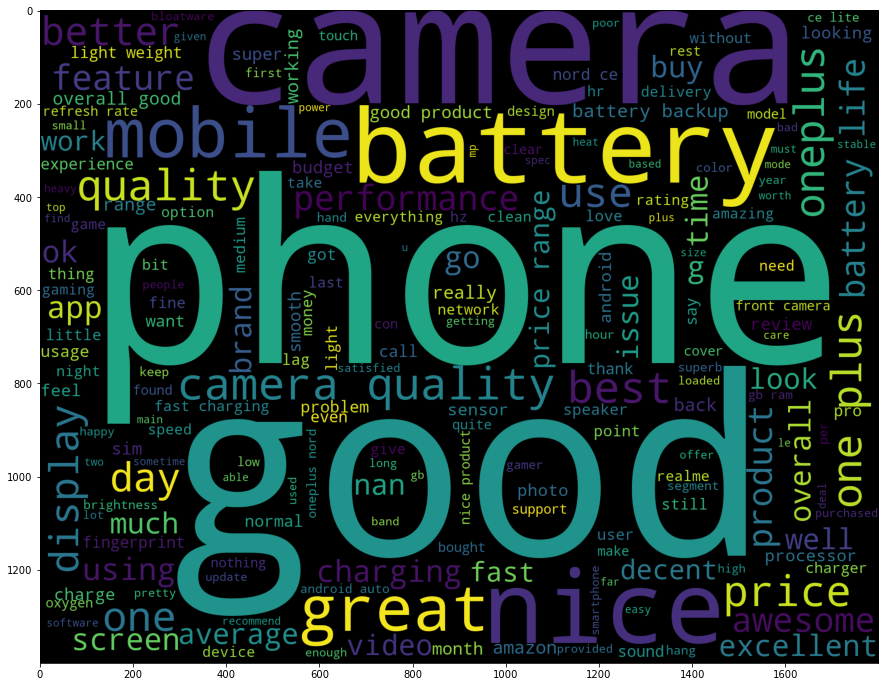

In [116]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

In [117]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

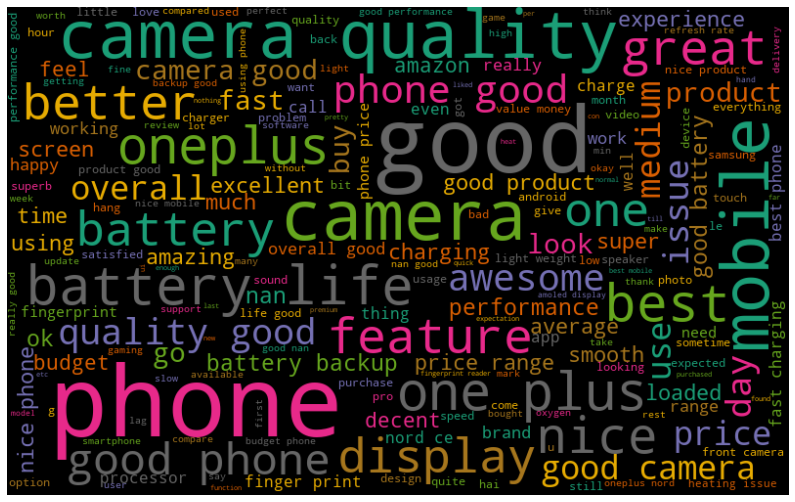

In [118]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

### Most common words in negative Review

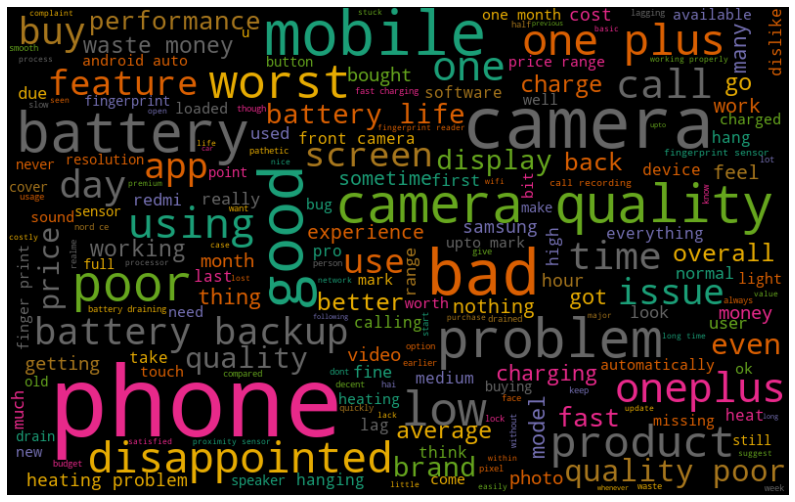

In [119]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)